### **"Comparative Analysis of Economic and Social Indicators in Chile (1990-Present): Verification of Public Narratives in an International Context"**

**Objective of the Study**

This work arises from the need to clarify and analyze economic and social indicators frequently cited by different ideological sectors in Chile. The main purpose is to verify the validity of these data, contextualize them (through international comparisons), and substantiate their interpretation, thus avoiding biased use or even the spread of fake news.

**Sources and Methodology**

Data will be obtained from:
1. International organizations: the World Bank, the International Monetary Fund (IMF), and other similar institutions, to place Chile in a global context.
2. National institutions: the Central Bank of Chile, the National Institute of Statistics (INE), among others, to delve deeper into country-specific statistics.
The analysis period spans from the 1990s to the present, allowing for the assessment of long-term trends.


**Critical Approach**

This analysis seeks to bring rigor to the public debate, differentiating between ideological perceptions and statistical reality.


In [109]:
#Libraries to use
import pandas as pd
from pandas_datareader import wb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.patches import Patch
import warnings

A Python function is created to query data from the World Bank. The parameters are as follows:
indicators: 

- Indicator codes (e.g., "NY.GDP.MKTP.CD" for GDP).

- countries: Country codes (e.g., "CL" for Chile, "US" for the United States).

- start and end: Start and end years of the period (e.g., 2000, 2020).

These return a Pandas DataFrame with the requested data.

In [111]:
def descargar_datos_wb(indicadores, paises, inicio, fin):      
    dfs = []
    
    for nombre, indicador in indicadores.items():
        try:
            # Descargar datos para el indicador actual
            df = wb.download(indicator=indicador, country=paises,start=inicio, end=fin)            
            df.reset_index(inplace=True)
            df['indicador'] = nombre  # Agregar columna con nombre del indicador
            df.rename(columns={indicador: 'valor'}, inplace=True)            
            dfs.append(df)            
        except Exception as e:
            print(f"Error al descargar el indicador {nombre} ({indicador}): {str(e)}")
    
    # Combinar todos los DataFrames
    if dfs:
        df_final = pd.concat(dfs, ignore_index=True)
        return df_final
    else:
        return pd.DataFrame()

print(type(descargar_datos_wb))

<class 'function'>


In [112]:
#Obtención países del Banco Mundial
countries = wb.get_countries()
print(type(countries))
countries.head(1)

<class 'pandas.core.frame.DataFrame'>


,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.5167


In [113]:
# Contar países por regiones
conteo_paises_region = countries['region'].value_counts().reset_index()
conteo_paises_region.columns = ['region', 'número_de_países']
print(conteo_paises_region)

                       region  número_de_países
0                  Aggregates                79
1       Europe & Central Asia                58
2         Sub-Saharan Africa                 48
3  Latin America & Caribbean                 42
4         East Asia & Pacific                37
5  Middle East & North Africa                21
6                  South Asia                 8
7               North America                 3


In [114]:
# Contar países por su clasificación
conteo_paises_clasificacion = countries['incomeLevel'].value_counts().reset_index()
print(conteo_paises_clasificacion)

           incomeLevel  count
0          High income     85
1           Aggregates     79
2  Upper middle income     54
3  Lower middle income     51
4           Low income     26
5       Not classified      1


**Countries List**

Here, the country or countries used in the analysis are detailed. Lists will be created as the analysis progresses and there is a need to review specific groups of countries, etc.

In [116]:
#Primer grupo. Países que son parte de la OCDE

#Lista de países (actualizada a 2023). 
oecd_countries = [
   'AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CRI',
    'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC',
    'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 
    'LVA', 'LTU', 'LUX', 'MEX', 'NLD', 'NZL',
    'NOR', 'POL', 'PRT', 'SVK', 'SVN', 'ESP', 
    'SWE', 'CHE', 'TUR', 'GBR', 'USA']

#Segundo grupo. Países de América Central y del Sur

central_south_america = ['BLZ', 'CRI', 'SLV', 'GTM', 'HND', 'NIC', 'PAN', 'ATG', 'BHS', 
          'BRB', 'CUB', 'DMA', 'GRD', 'HTI', 'JAM', 'DOM', 'KNA', 'VCT', 
          'LCA', 'TTO', 'ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 
          'PRY', 'PER', 'SUR', 'URY', 'VEN', 'PRI']

In [117]:
type(central_south_america)

list

**The growth of the Gross Domestic Product (GDP) in Chile**

Who has not heard in the debates that Chile is far from the economic growth achieved during the 1990s, those first years of the Concertación. Academics and political agree that inherited poverty bags would hardly have been overcome without the sustained boom of that "golden age."

The economic opening after the military dictatorship evokes in the citizen memory the irruption of the shopping centers - the large malls - that displaced the traditional "Persian" and "snails" of the eighties. This period without a doubt, the beginning of a growing consumption by families, in search of an improvement in their quality of material life.

To analyze GDP, the first step is to define which indicator to use. To do this, a World Bank database will be downloaded that includes all relevant GDP variables.

In [119]:
# Buscar indicadores relacionados con "gdp"
resultados = wb.search('gdp')

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar las primeras filas y también generar un archivo excel por una sola vez
#df_resultados.to_excel('GPD.xlsx')
df_resultados.head(1)

,id,name,unit,source,sourceNote,sourceOrganization,topics
688,6.0.GDP_current,GDP (current $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth


The selection of the **indicator NY.GDP.MKTP.KD.ZG** refers to the Annual percentage growth rate of Gross Domestic Product (GDP) at market prices in constant local currency. The data, expressed as a percentage, will initiate an introductory research process that will strengthen the analysis due to the correct and timely choice of indicators, which will reflect the political and social economy of post-dictatorship Chile.



**Comparative GDP Analysis: Chile and OECD Countries**

This study examines the evolution of Gross Domestic Product (GDP) in OECD member countries and its comparison with Chile, which joined the organization in 2010. The analysis covers three key periods:

The initial expansion years (1990-1995): Corresponds to the first five years following Chile's return to democracy.

The pre-pandemic period (2015-2019): Represents the years of economic stability prior to the COVID-19 crisis.

The post-pandemic phase (2021-2023): Reflects the recent economic recovery.

It should be noted that the analysis considers current members of the organization as "OECD countries," regardless of their accession date during the periods studied.


In [122]:
# Crecimiento del PIB y los países del OCDE
indicadores = {
    'crecimiento del PIB': 'NY.GDP.MKTP.KD.ZG'}

paises = [
    'AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CRI',
    'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC',
    'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 
    'LVA', 'LTU', 'LUX', 'MEX', 'NLD', 'NZL',
    'NOR', 'POL', 'PRT', 'SVK', 'SVN', 'ESP', 
    'SWE', 'CHE', 'TUR', 'GBR', 'USA']

df_pib = descargar_datos_wb(indicadores, paises, '1990', '2023')
#df_pib.to_excel('pib.xlsx') #Exportar archivo para revisar la consistencia de los datos.
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1292 non-null   object 
 1   year       1292 non-null   object 
 2   valor      1285 non-null   float64
 3   indicador  1292 non-null   object 
dtypes: float64(1), object(3)
memory usage: 40.5+ KB


C:\Users\Paula\AppData\Local\Temp\ipykernel_7428\1223811666.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=indicador, country=paises,start=inicio, end=fin)


In [123]:
# Preparación de los datos

# Convertir 'year' a numérico (si aún no lo está)
df_pib['year'] = pd.to_numeric(df_pib['year'], errors='coerce')

# Filtrar y sumar valores para 1990-1993
df_90 = df_pib[(df_pib['year'] >= 1990) & (df_pib['year'] <= 1995)].groupby('country')['valor'].sum().reset_index()
df_90 = df_90.rename(columns={'valor': 'sum_1990_1995'})  # Renombrar columna

# Ordenar el dataframe por sum_1990_1995 de forma descendente y agregar ranking
df_90 = df_90.sort_values('sum_1990_1995', ascending=False).reset_index(drop=True)
df_90['ranking_1990_1995'] = df_90.index + 1  # +1 para que empiece en 1 en lugar de 0

# Filtrar y sumar valores para 2010-2015
df_20 = df_pib[(df_pib['year'] >= 2010) & (df_pib['year'] <= 2015)].groupby('country')['valor'].sum().reset_index()
df_20 = df_20.rename(columns={'valor': 'sum_2010_2015'})  # Renombrar columna

# Hacer un left join para mantener todas las filas de df_20
df_20 = pd.merge(
    df_20,
    df_90[['country', 'ranking_1990_1995']],  # Seleccionar solo las columnas que necesitas
    on='country',  # Columna común para unir
    how='left'     # Mantener todas las filas del dataframe izquierdo
)

# Filtrar y sumar valores para 2020-2023
df_2020 = df_pib[(df_pib['year'] >= 2020) & (df_pib['year'] <= 2023)].groupby('country')['valor'].sum().reset_index()
df_2020 = df_2020.rename(columns={'valor': 'sum_2020_2023'})  # Renombrar columna
df_90.head(2)

,country,sum_1990_1995,ranking_1990_1995
0,"Korea, Rep.",52.614957,1
1,Chile,42.856943,2


In [124]:
#Al dataframe countries, a la variable 'name' se le renombra a 'country' 
countries.rename(columns={'name': 'country'}, inplace=True)

In [125]:
# Hacer un left join para cada dataframe
df_90_completo = pd.merge(df_90,
    countries[['country', 'region', 'incomeLevel']],  # Seleccionar solo las columnas que necesitas
    on='country',  # Columna común para unir
    how='left')     # Mantener todas las filas del dataframe izquierdo

# Hacer un left join para mantener todas las filas
df_20_completo = pd.merge(df_20,     countries[['country', 'region', 'incomeLevel']], on='country', how='left') 

# Hacer un left join para mantener todas las filas
df_2020_completo = pd.merge(df_2020, countries[['country', 'region', 'incomeLevel']], on='country', how='left') 

df_2020_completo.head(1)

,country,sum_2020_2023,region,incomeLevel
0,Australia,9.675955,East Asia & Pacific,High income


**Bar Chart**

The graphs describe three periods related to GDP growth. The first covers the 1990s, from 1990 to 1995. The second covers the years 2010 to 2015, and the third covers the years 2020 to 2023.

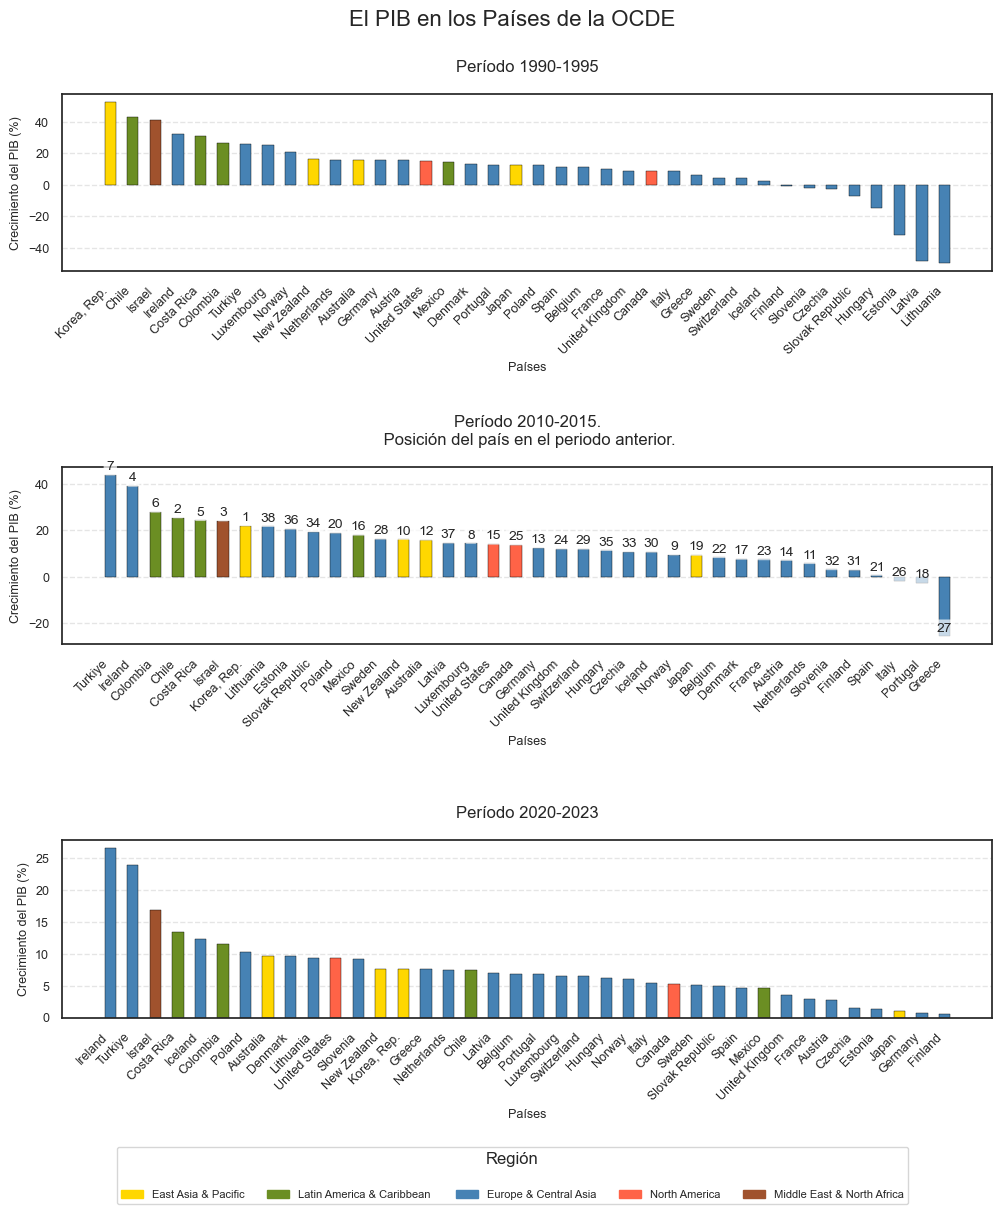

In [127]:
# --- Configuración de estilo ---
sns.set_theme(style="white")  # Fondo blanco para todos los gráficos

# --- Parámetros unificados ---
bar_width = 0.2
space_between_bars = 0.2
fontsize_labels = 9
fontsize_ticks = 9
rotation_xticks = 45

# --- Colores por región ---
color_por_region = {'East Asia & Pacific': 'gold',     'Latin America & Caribbean ': 'olivedrab',
    'Europe & Central Asia': 'steelblue', 'North America': 'tomato', 'Middle East & North Africa': 'sienna'}

# --- Función para graficar ---
def plot_growth(ax, df, x_positions, column, title, ranking_column=None):
    df_sorted = df.sort_values(column, ascending=False)
    bars = ax.bar(x_positions, df_sorted[column], width=bar_width, 
                  color=[color_por_region.get(region, 'gray') for region in df_sorted['region']],
                  edgecolor='black',linewidth=0.3)
    
    ax.set_title(title, fontsize=12, pad=16)
    ax.set_xlabel('Países', fontsize=fontsize_labels)
    ax.set_ylabel('Crecimiento del PIB (%)', fontsize=fontsize_labels)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(df_sorted['country'], rotation=rotation_xticks, ha='right', fontsize=fontsize_ticks)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Añade esto para ajustar los ticks del eje Y
    ax.tick_params(axis='y', labelsize=fontsize_ticks) 
    
    # Añadir rankings
    if ranking_column:
        for bar, valor, ranking in zip(bars, df_sorted[column], df_sorted[ranking_column]):
            ax.text(bar.get_x() + bar.get_width()/2, valor + (0.02 * df_sorted[column].max()),
                str(int(ranking)), ha='center', va='bottom', fontsize=10,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2')            )
    return bars

# --- Figura y subplots ---
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
fig.suptitle('El PIB en los Países de la OCDE\n', fontsize=16, y=0.95)
plt.subplots_adjust(hspace=1.1)

# Posiciones x comunes
x_positions = np.arange(len(df_90_completo['country'])) * (bar_width + space_between_bars)


# --- Generación de gráficos ---
plot_growth(axes[0], df_90_completo, x_positions, 'sum_1990_1995', 'Período 1990-1995')
plot_growth(axes[1], df_20_completo, x_positions, 'sum_2010_2015', 'Período 2010-2015.\n Posición del país en el periodo anterior.', 'ranking_1990_1995')
plot_growth(axes[2], df_2020_completo, x_positions, 'sum_2020_2023', 'Período 2020-2023')

# --- Leyenda ---
handles = [Patch(color=color, label=region) for region, color in color_por_region.items()]
fig.legend(    handles=handles, title='Región\n', loc='lower center',
    bbox_to_anchor=(0.5, -0.05), ncol=5, fontsize=8)

plt.show()

**Review of GDP in Latin and South American countries**

A database of countries in the region will be generated, but only for the year 2023. GDP growth for that year will be shown and compared with the average for OECD countries for that same year.

In [129]:
# Indicador a explorar:
indicadores = {
    'crecimiento del PIB': 'NY.GDP.MKTP.KD.ZG'    }

paises = ['BLZ', 'CRI', 'SLV', 'GTM', 'HND', 'NIC', 'PAN', 'ATG', 'BHS', 
          'BRB', 'CUB', 'DMA', 'GRD', 'HTI', 'JAM', 'DOM', 'KNA', 'VCT', 
          'LCA', 'TTO', 'ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 
          'PRY', 'PER', 'SUR', 'URY', 'VEN', 'PRI']

pib_america = descargar_datos_wb(indicadores, paises, '2023', '2023')
#pib_america.to_excel('pib_america.xlsx')
pib_america.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    33 non-null     object 
 1   year       33 non-null     object 
 2   valor      32 non-null     float64
 3   indicador  33 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.2+ KB


C:\Users\Paula\AppData\Local\Temp\ipykernel_7428\1223811666.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=indicador, country=paises,start=inicio, end=fin)


In [130]:
#Ahora se desea obtener el promedio del crecimiento del PIB de los países OCDE
#Aplicar funcion para obtener los datos solo del año 2022
indicadores = {'crecimiento del PIB': 'NY.GDP.MKTP.KD.ZG' }
paises = ['AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CRI', 'CZE', 
          'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL',
          'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 'LVA', 'LTU', 'LUX',
          'MEX', 'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'SVN',
          'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 'USA']

pib_ocde = descargar_datos_wb(indicadores, paises, '2022', '2022')
pib_ocde.info()

#Obtención del promedio, usando la función mean
OCDE_prom = pib_ocde['valor'].mean()
round(OCDE_prom, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    38 non-null     object 
 1   year       38 non-null     object 
 2   valor      38 non-null     float64
 3   indicador  38 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.3+ KB


C:\Users\Paula\AppData\Local\Temp\ipykernel_7428\1223811666.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=indicador, country=paises,start=inicio, end=fin)


3.75

In [131]:
#La lista de países OCDE se modifica en sus valores
paises_ocde = ['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
    'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
    'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Republic of',
    'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand',
    'Norway', 'Poland', 'Portugal', 'Slovakia', 'Slovenia', 'Spain',
    'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']

#Se pasa la lista 'paises_oecd' a un DataFrame y se agrega la columna "entidad" con valor "OCDE"
OCDE = pd.DataFrame(paises_ocde, columns=["country"])
OCDE['entidad'] = 'OCDE'

In [132]:
#Se aplica el left join
pib_amer = pd.merge(pib_america,
    OCDE[['country', 'entidad']],  # Seleccionar solo las columnas necesarias
    on='country', how='left')
pib_amer.fillna({'entidad': 'NO OCDE'}, inplace=True)
#pib_amer.to_excel('pib_american.xlsx') #Exportar archivo para revisar la consistencia de los datos.

In [134]:
# Indicador a explorar:
indicadores = {
    'PIB per capita': 'NY.GDP.PCAP.CD'    }

paises = ['BLZ', 'CRI', 'SLV', 'GTM', 'HND', 'NIC', 'PAN', 'ATG', 'BHS', 
          'BRB', 'CUB', 'DMA', 'GRD', 'HTI', 'JAM', 'DOM', 'KNA', 'VCT', 
          'LCA', 'TTO', 'ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 
          'PRY', 'PER', 'SUR', 'URY', 'VEN', 'PRI']

percapita_america = descargar_datos_wb(indicadores, paises, '2023', '2023')
#percapita_america.to_excel('percapita_america.xlsx')
percapita_america.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    33 non-null     object 
 1   year       33 non-null     object 
 2   valor      31 non-null     float64
 3   indicador  33 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.2+ KB


C:\Users\Paula\AppData\Local\Temp\ipykernel_7428\1223811666.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=indicador, country=paises,start=inicio, end=fin)


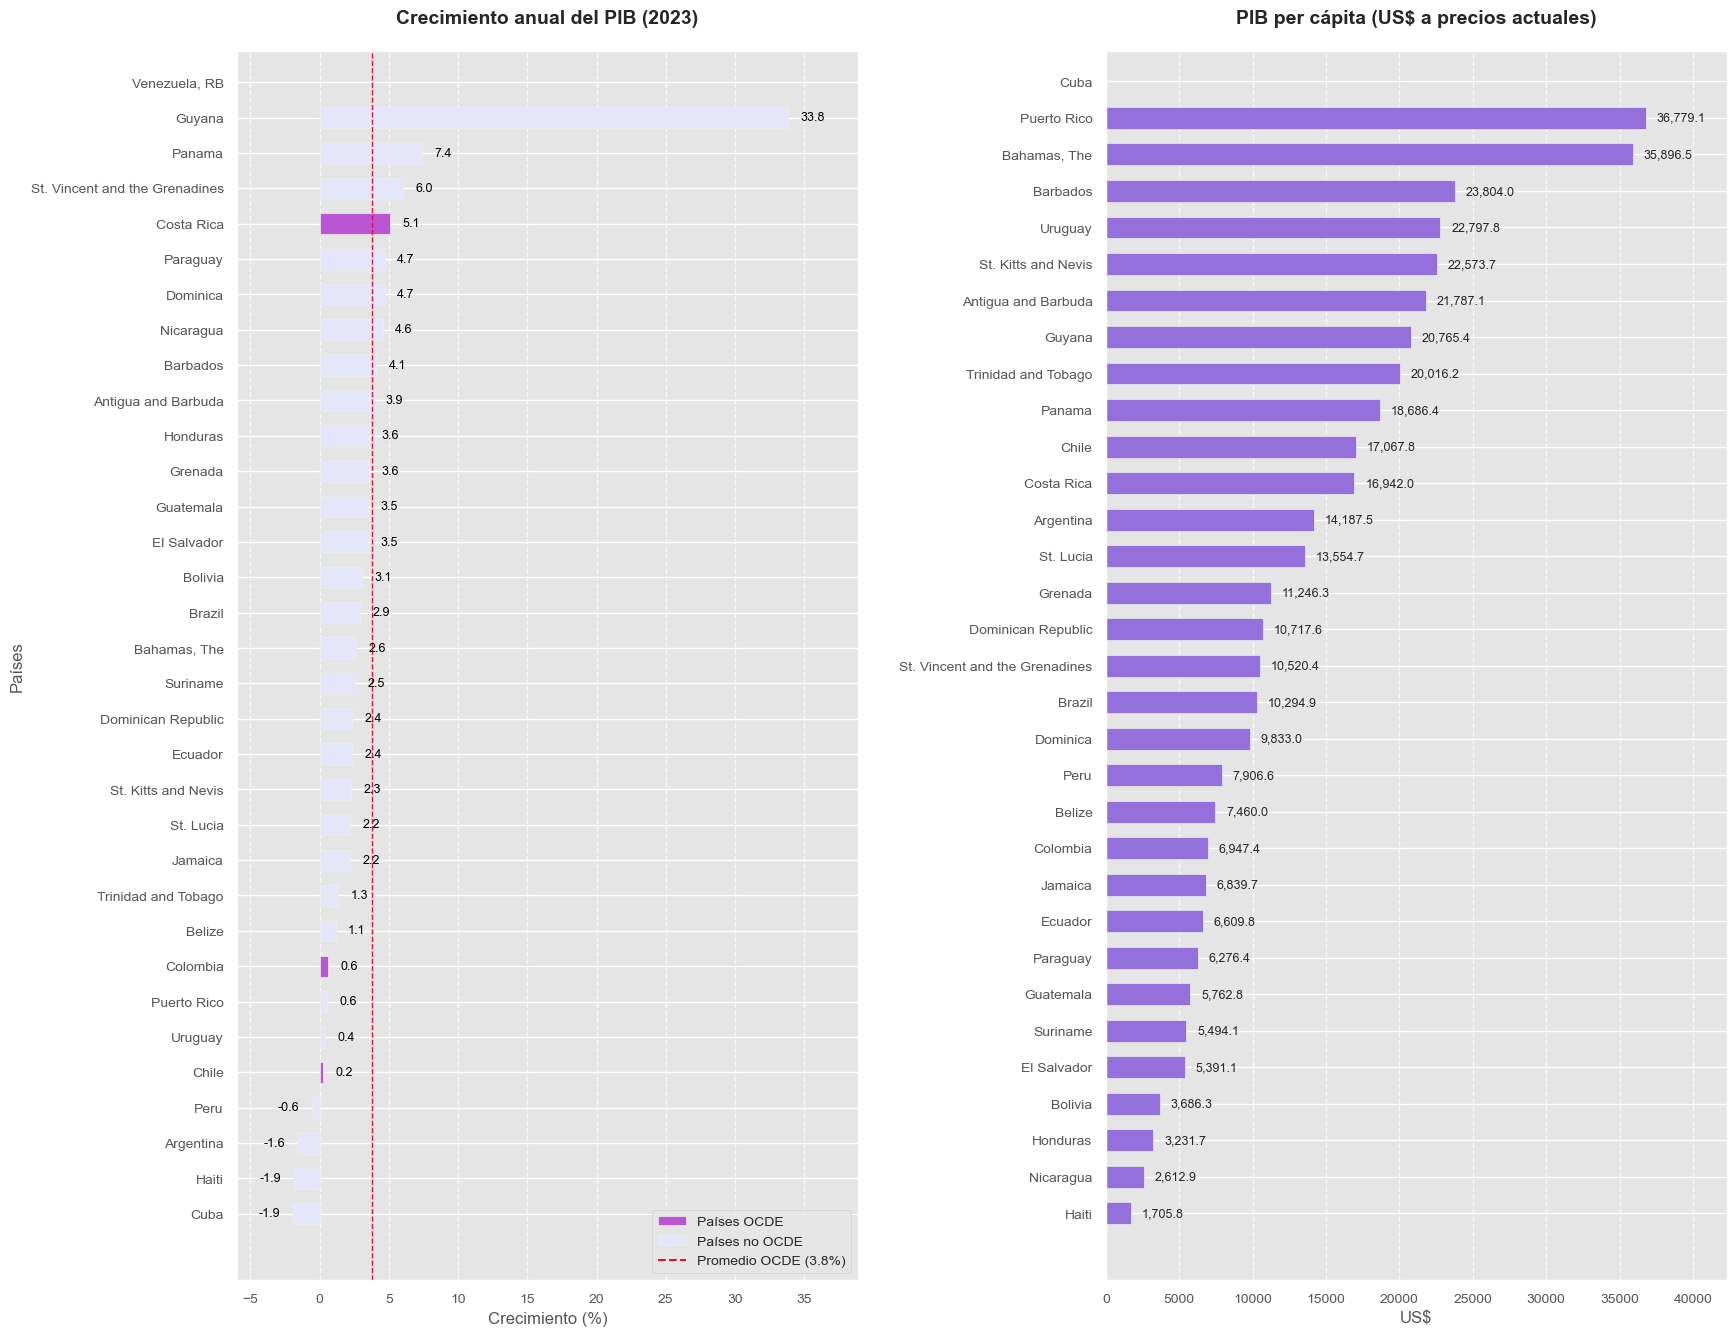

In [167]:
# Configuración general de estilo
plt.style.use('ggplot')
plt.rcParams['figure.facecolor'] = 'white'

# Crear figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 14))

# --- PRIMER GRÁFICO: Crecimiento del PIB ---
pib_amer = pib_amer.sort_values('valor', ascending=True)

# Configuración de colores
color_map = {'OCDE': 'mediumorchid', 'NO OCDE': 'lavender'}
colors = pib_amer['entidad'].map(color_map)

# Calculamos límites del eje X considerando valores negativos
x_min = min(pib_amer['valor']) * 3.1 if min(pib_amer['valor']) < 0 else 0
x_max = max(pib_amer['valor']) * 1.15

# Barras horizontales
bars1 = ax1.barh(pib_amer['country'], pib_amer['valor'], color=colors, height=0.6)

# Línea de promedio OCDE
ax1.axvline(x=OCDE_prom, color='crimson', linestyle='--', linewidth=1.0, 
            label=f'Promedio OCDE ({OCDE_prom:.1f}%)')

# Personalización
ax1.set_title('Crecimiento anual del PIB (2023)', fontsize=14, pad=20, fontweight='bold')
ax1.set_xlabel('Crecimiento (%)', fontsize=12)
ax1.set_ylabel('Países', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)
ax1.grid(axis='x', linestyle='--', alpha=0.7)
ax1.set_xlim(x_min, x_max)  # Límites ajustados para negativos

# Etiquetas de valores (colocadas inteligentemente según el signo)
for bar in bars1:
    width = bar.get_width()
    if not pd.isna(width):
        if width >= 0:
            # Para valores positivos: etiqueta a la derecha
            x_pos = width + 0.02 * (x_max - x_min)
            ha = 'left'
            color = 'black'
        else:
            # Para valores negativos: etiqueta a la izquierda
            x_pos = width - 0.02 * (x_max - x_min)
            ha = 'right'
            color = 'black'
        
        ax1.text(x_pos, bar.get_y() + bar.get_height()/2, f'{width:.1f}',
                ha=ha, va='center', fontsize=9, color=color)

# Leyenda
legend_elements1 = [
    Patch(facecolor='mediumorchid', label='Países OCDE'),
    Patch(facecolor='lavender', label='Países no OCDE'),
    plt.Line2D([0], [0], color='crimson', linestyle='--', 
              label=f'Promedio OCDE ({OCDE_prom:.1f}%)')
]
ax1.legend(handles=legend_elements1, loc='lower right', fontsize=10)

# --- SEGUNDO GRÁFICO: PIB per cápita (se mantiene igual) ---
percapita_america = percapita_america.sort_values('valor', ascending=True)

bars2 = ax2.barh(percapita_america['country'], percapita_america['valor'], 
                color='mediumpurple', height=0.6)

ax2.set_title('PIB per cápita (US$ a precios actuales)', fontsize=14, pad=20, fontweight='bold')
ax2.set_xlabel('US$', fontsize=12)
ax2.set_ylabel('')
ax2.tick_params(axis='both', labelsize=10)
ax2.grid(axis='x', linestyle='--', alpha=0.7)
ax2.set_xlim(0, max(percapita_america['valor']) * 1.15)

for bar in bars2:
    width = bar.get_width()
    if not pd.isna(width):
        ax2.text(width + 0.02 * max(percapita_america['valor']), 
                bar.get_y() + bar.get_height()/2, 
                f'{width:,.1f}',
                ha='left', va='center', fontsize=9)

# Ajuste final
plt.tight_layout(pad=3.0)
plt.show()